In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [10]:
# Student data filepath
student_data_path = "data/StudentPerformanceFactors.csv"

# Student data dataframe created by reading the CSV with pandas
student_df = pd.read_csv(student_data_path)


In [19]:
student_df

,Hours_Studied,Attendance,Parental_Involvement,Access_to_Resources,Extracurricular_Activities,Sleep_Hours,Previous_Scores,Motivation_Level,Internet_Access,Tutoring_Sessions,Family_Income,Teacher_Quality,School_Type,Peer_Influence,Physical_Activity,Learning_Disabilities,Parental_Education_Level,Distance_from_Home,Gender,Exam_Score
0,23,84,Low,High,No,7,73,Low,Yes,0,Low,Medium,Public,Positive,3,No,High School,Near,Male,67
1,19,64,Low,Medium,No,8,59,Low,Yes,2,Medium,Medium,Public,Negative,4,No,College,Moderate,Female,61
2,24,98,Medium,Medium,Yes,7,91,Medium,Yes,2,Medium,Medium,Public,Neutral,4,No,Postgraduate,Near,Male,74
3,29,89,Low,Medium,Yes,8,98,Medium,Yes,1,Medium,Medium,Public,Negative,4,No,High School,Moderate,Male,71
4,19,92,Medium,Medium,Yes,6,65,Medium,Yes,3,Medium,High,Public,Neutral,4,No,College,Near,Female,70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6602,25,69,High,Medium,No,7,76,Medium,Yes,1,High,Medium,Public,Positive,2,No,High School,Near,Female,68
6603,23,76,High,Medium,No,8,81,Medium,Yes,3,Low,High,Public,Positive,2,No,High School,Near,Female,69
6604,20,90,Medium,Low,Yes,6,65,Low,Yes,3,Low,Medium,Public,Negative,2,No,Postgraduate,Near,Female,68
6605,10,86,High,High,Yes,6,91,High,Yes,2,Low,Medium,Private,Positive,3,No,High School,Far,Female,68


In [21]:
# Average Exam Score by Gender
gender_patterns = student_df.groupby('Gender')['Exam_Score'].mean().reset_index()
print(gender_patterns)

   Gender  Exam_Score
0  Female   67.244898
1    Male   67.228894


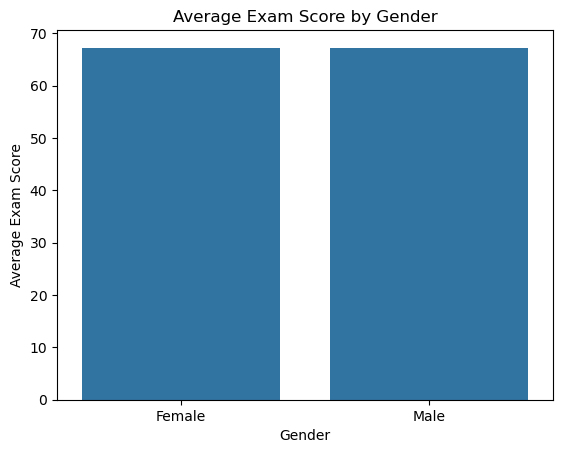

In [29]:
sns.barplot(x='Gender', y='Exam_Score', data=gender_patterns)
plt.title('Average Exam Score by Gender')
plt.ylabel('Average Exam Score')
plt.show()

In [27]:
# Comparing Exam Scores based on Tutoring Sessions
tutoring_effectiveness = student_df.groupby('Tutoring_Sessions')['Exam_Score'].mean().reset_index()
print(tutoring_effectiveness)

   Tutoring_Sessions  Exam_Score
0                  0   66.489755
1                  1   66.980266
2                  2   67.567010
3                  3   67.894737
4                  4   68.229236
5                  5   69.067961
6                  6   71.666667
7                  7   69.857143
8                  8   69.000000


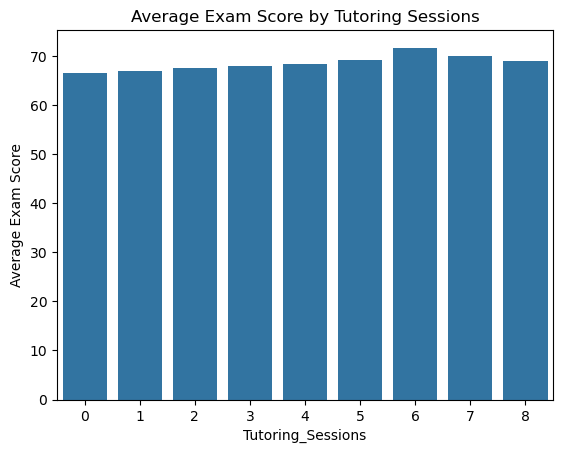

In [36]:
sns.barplot(x='Tutoring_Sessions', y='Exam_Score', data=tutoring_effectiveness)
plt.title('Average Exam Score by Tutoring Sessions')
plt.ylabel('Average Exam Score')
plt.show()

In [38]:
# Calculate correlation
correlation = student_df['Sleep_Hours'].corr(student_df['Attendance'])
print(f"Correlation between Sleep Hours and Attendance: {correlation}")

Correlation between Sleep Hours and Attendance: -0.015917825765680824


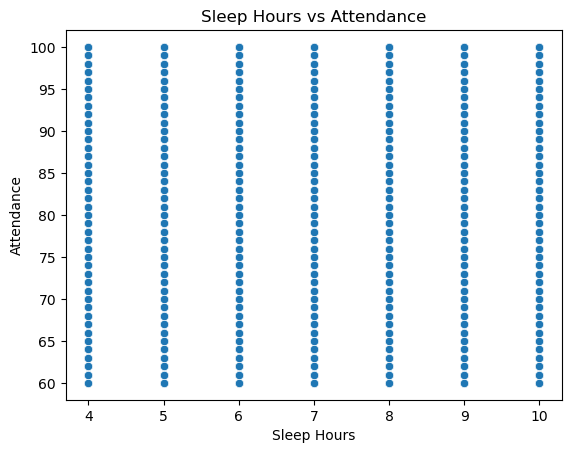

In [60]:
sns.scatterplot(x='Sleep_Hours', y='Attendance', data=student_df)
plt.title('Sleep Hours vs Attendance')
plt.xlabel('Sleep Hours')
plt.ylabel('Attendance')
plt.show()

In [64]:
# Convert 'Motivation_Level' to numerical values
motivation_mapping = {'Low': 1, 'Medium': 2, 'High': 3}
student_df['Motivation_Level_Numeric'] = student_df['Motivation_Level'].map(motivation_mapping)
# Average Motivation Level based on Parental Involvement
motivation_analysis = student_df.groupby('Parental_Involvement')['Motivation_Level_Numeric'].mean().reset_index()
order = ['Low', 'Medium', 'High']
print(motivation_analysis)

  Parental_Involvement  Motivation_Level_Numeric
0                 High                  1.887317
1                  Low                  1.932685
2               Medium                  1.906901


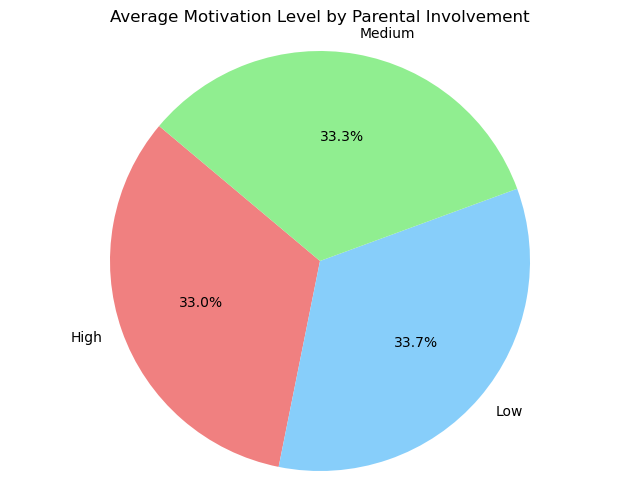

In [68]:
# Prepare data for pie chart
labels = motivation_analysis['Parental_Involvement']
sizes = motivation_analysis['Motivation_Level_Numeric']
colors = ['lightcoral', 'lightskyblue', 'lightgreen']  # You can choose your colors

# Create pie chart
plt.figure(figsize=(8, 6))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Average Motivation Level by Parental Involvement')
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.show()

In [70]:
import statsmodels.api as sm

In [74]:
# Define your independent variables (X) and dependent variable (y)
X = student_df[['Hours_Studied', 'Attendance', 'Parental_Involvement', 'Sleep_Hours', 'Previous_Scores', 'Motivation_Level']]
y = student_df['Exam_Score']

In [76]:
# Add a constant to the model
X = sm.add_constant(X)

In [78]:
# Fit the regression model
model = sm.OLS(y, X).fit()
print(model.summary())

ValueError: Pandas data cast to numpy dtype of object. Check input data with np.asarray(data).